# Dijkstra算法

https://www.cnblogs.com/wkynf/p/15202701.html

In [1]:
import networkx as nx

In [10]:
G = nx.Graph()
for i in range(0, 9):
    G.add_node(i)
links_weight = [
    (0, 1, 4),
    (1, 2, 8),
    (2, 3, 7),
    (3, 4, 9),
    (4, 5, 10),
    (5, 6, 2),
    (6, 7, 1),
    (7, 0, 8),
    (7, 8, 7),
    (8, 6, 6),
    (2, 8, 4),
    (6, 8 , 2),
    (2, 5, 4),
    (3, 5, 14),
    (1, 7, 11),
]
for link in links_weight:
    G.add_edge(link[0], link[1], weight=link[2])


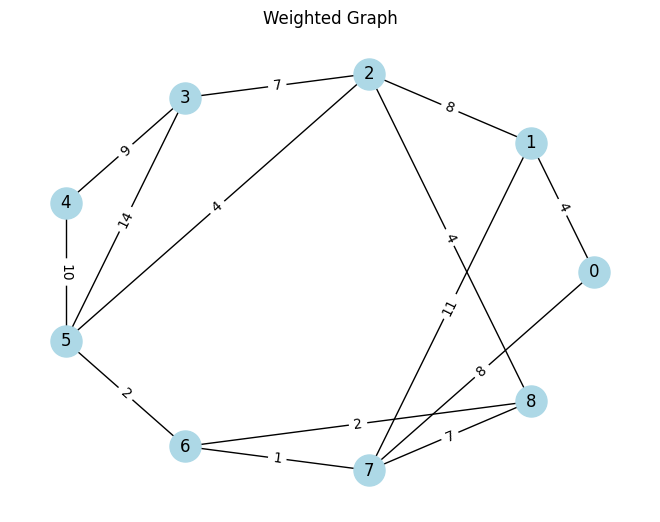

In [12]:
import matplotlib.pyplot as plt

# 设置布局（可选：spring, circular, random...）
pos = nx.circular_layout(G)

# 绘制节点和边
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)

# 提取边权重并显示
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Weighted Graph")
plt.show()

In [32]:
def dijkstra(graph, start):
    # 初始化距离和前驱节点
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start] = 0
    predecessors = {node: None for node in graph.nodes()}
    
    # 创建一个优先队列
    queue = [(0, start)]

    cnt = 0
    
    while queue:
        cnt += 1
        current_distance, current_node = queue.pop(0)
        
        # 如果当前距离大于已知距离，则跳过
        if current_distance > distances[current_node]:
            continue
        
        # 遍历邻居节点
        for neighbor, attributes in graph[current_node].items():
            weight = attributes['weight']
            # 计算新距离
            distance = current_distance + weight
            
            # 如果找到更短的路径，则更新距离和前驱节点
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                queue.append((distance, neighbor))
        # queue按距离排序
        queue.sort(key=lambda x: x[0])
    return distances, predecessors

In [33]:
%%timeit
distances, predecessors = dijkstra(G, 0)
# display(distances)

14.9 μs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [35]:
def dijkstra(graph, start):
    # 初始化距离和前驱节点
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start] = 0
    predecessors = {node: None for node in graph.nodes()}
    
    # 创建一个优先队列
    queue = [(0, start)]

    cnt = 0
    
    while queue:
        cnt += 1
        current_distance, current_node = queue.pop(0)
        
        # 如果当前距离大于已知距离，则跳过
        if current_distance > distances[current_node]:
            continue
        
        # 遍历邻居节点
        for neighbor, attributes in graph[current_node].items():
            weight = attributes['weight']
            # 计算新距离
            distance = current_distance + weight
            
            # 如果找到更短的路径，则更新距离和前驱节点
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                queue.append((distance, neighbor))
        # queue按距离排序
        # queue.sort(key=lambda x: x[0])
    return distances, predecessors

In [36]:
%%timeit
distances, predecessors = dijkstra(G, 0)
# display(distances)

12.3 μs ± 99 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## 排序会减少迭代次数，但是排序本身会增加时间复杂度
- 使用优先级队列，优先级队列的复杂度是O(logn)，可能效果会更好

In [37]:
from heapq import heappop, heappush
def dijkstra(graph, start):
    # 初始化距离和前驱节点
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start] = 0
    predecessors = {node: None for node in graph.nodes()}
    
    # 创建一个优先队列
    queue = []
    heappush(queue, (0, start))

    cnt = 0
    
    while queue:
        cnt += 1
        current_distance, current_node = heappop(queue)
        
        # 如果当前距离大于已知距离，则跳过
        if current_distance > distances[current_node]:
            continue
        
        # 遍历邻居节点
        for neighbor, attributes in graph[current_node].items():
            weight = attributes['weight']
            # 计算新距离
            distance = current_distance + weight
            
            # 如果找到更短的路径，则更新距离和前驱节点
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heappush(queue,(distance, neighbor))
        # queue按距离排序
        # queue.sort(key=lambda x: x[0])
    return distances, predecessors

In [38]:
%%timeit
distances, predecessors = dijkstra(G, 0)
# display(distances)

13.1 μs ± 69.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## 似乎对于简单情况，不排序的效率更高，排序使用堆排序会更好一点